In [1]:
from pylab import *
from numpy import *
import codecs
import matplotlib.pyplot as plt

In [22]:
#定义数据集规模
size = 200
#自定义生成数据集(符合正态分布)
dataA = np.random.normal((3,1.5),0.7,(size,2))
dataB = np.random.normal((8,4),0.7,(size,2))
dataC = np.random.normal((7,1),0.7,(size,2))
data_output = np.vstack((dataA,dataB,dataC))
np.random.shuffle(data_output)


No handles with labels found to put in legend.


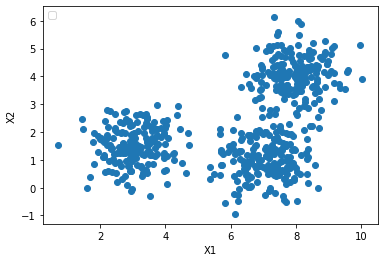

In [23]:
##数据集可视化:
plt.scatter(data_output[:,0],data_output[:,1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'upper left')
plt.show()

In [24]:
datas = data_output
labels=[]

In [25]:
#计算欧氏距离
def distance(x1,x2):
    return sqrt(sum(power(x1-x2,2)))

In [26]:
#聚类中心
def nearest(point, cluster_centers):
    min_dist = inf
    m = np.shape(cluster_centers)[0]  # 当前已经初始化的聚类中心的个数
    for i in range(m):
        # 计算point与每个聚类中心之间的距离
        d = distance(point, cluster_centers[i, ])
        # 选择最短距离
        if min_dist > d:
            min_dist = d
    return min_dist


In [27]:
#选择尽可能相距较远的聚类中心
def get_centroids(dataset, k):
    m, n = np.shape(dataset)
    cluster_centers = np.zeros((k , n))
    index = np.random.randint(0, m)
    cluster_centers[0,] = dataset[index, ]
    # 初始化距离序列
    d = [0.0 for _ in range(m)]
    for i in range(1, k):
        sum_all = 0
        for j in range(m):
            # 对每一个样本找到最近的聚类中心点
            d[j] = nearest(dataset[j, ], cluster_centers[0:i, ])
            # 将所有的最短距离相加
            sum_all += d[j]
        # 取得sum_all之间的随机值
        sum_all *= random.rand()
        # 获得距离最远的样本点作为聚类中心点
        for j, di in enumerate(d):
            sum_all=sum_all - di
            if sum_all > 0:
                continue
            cluster_centers[i,] = dataset[j, ]
            break
    return cluster_centers

In [28]:
#主程序
def Kmeans(dataset,k):
    row_m=shape(dataset)[0]
    cluster_assign=zeros((row_m,2))
    center=get_centroids(dataset,k)
    change=True
    while change:
        change=False
        for i in range(row_m):
            mindist=inf
            min_index=-1
            for j in range(k):
                distance1=distance(center[j,:],dataset[i,:])
                if distance1<mindist:
                    mindist=distance1
                    min_index=j
            if cluster_assign[i,0] != min_index:
                change=True
            cluster_assign[i,:]=min_index,mindist**2
        for cen in range(k):
            cluster_data=dataset[nonzero(cluster_assign[:,0]==cen)]
            center[cen,:]=mean(cluster_data,0)
    return center ,cluster_assign


In [29]:
cluster_center,cluster_assign=Kmeans(datas,3)
print(cluster_center)

[[7.07599112 1.01825972]
 [7.95535108 4.09266555]
 [3.06039346 1.50665525]]


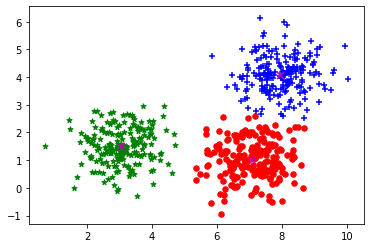

In [30]:
#散点图
f1 = plt.figure(1)
plt.scatter(datas[nonzero(cluster_assign[:,0]==0),0],datas[nonzero(cluster_assign[:,0]==0),1],marker='o',color='r',label='0',s=30)
plt.scatter(datas[nonzero(cluster_assign[:,0]==1),0],datas[nonzero(cluster_assign[:,0]==1),1],marker='+',color='b',label='1',s=30)
plt.scatter(datas[nonzero(cluster_assign[:,0]==2),0],datas[nonzero(cluster_assign[:,0]==2),1],marker='*',color='g',label='2',s=30)
plt.scatter(cluster_center[:,0],cluster_center[:,1],marker = 'x', color = 'm', s = 50)
plt.show()
